# Importing Library

In [1]:
# Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization
sns.set_style('whitegrid')

# Getting Data

In [2]:
# Getting the data

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  

In [3]:
# Concatenating features and targets column
df = pd.concat([X,y], axis = 1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
print(f"Number of rows : {df.shape[0]}")
print(f"Number of columns : {df.shape[1]}")

Number of rows : 48842
Number of columns : 15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# Looking at all the unique values for object dtype

for col in df.select_dtypes('object').columns: 
    print(f"{col} :")
    print(df[col].unique())
    print("\n")

workclass :
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]


education :
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


marital-status :
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


occupation :
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]


relationship :
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


race :
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']


sex :
['Male' 'Female']


native-country :
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puert

From above we can see that 'workclass', 'native-country', and 'occupation' have null values. Also in 'workclass' and 'occupation' column there are value of '?'. We will try to fix this and dive deeper on the later section. \
\
Also, there seem to be misunderstanding with 'income' column where there are double value. We will try to fix that.

In [7]:
for num_col in df.select_dtypes('int').columns:
    if df[num_col].isnull().sum() > 0:
        print(f"{num_col} has missing value")
    else:
        print(f"{num_col} doesnt have missing value")

age doesnt have missing value
fnlwgt doesnt have missing value
education-num doesnt have missing value
capital-gain doesnt have missing value
capital-loss doesnt have missing value
hours-per-week doesnt have missing value


There are no missing values for column with integer data types.

In [8]:
# fixing 'income' column
income_fix = {'<=50K.' : '<=50K',
              '>50K.' : '>50K'}

df['income'] = df['income'].apply(lambda val: income_fix[val] if (val == '<=50K.') or (val == '>50K.') else val)

In [9]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [10]:
# Removing Duplicates

print(f"Data before removing duplicates: {df.shape[0]}")
df.drop_duplicates(inplace = True)
print(f"Data after dropping duplicates : {df.shape[0]}")


Data before removing duplicates: 48842
Data after dropping duplicates : 48794


There are duplicates row.

In [11]:
# Statistical Descriptive

df.select_dtypes(['integer', 'float']).describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48794.000000,4.879400e+04,48794.000000,48794.000000,48794.000000,48794.000000
mean,38.651474,1.896688e+05,10.078862,1080.129135,87.588392,40.426056
std,13.708757,1.056171e+05,2.569975,7455.606716,403.193381,12.392297
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# EDA

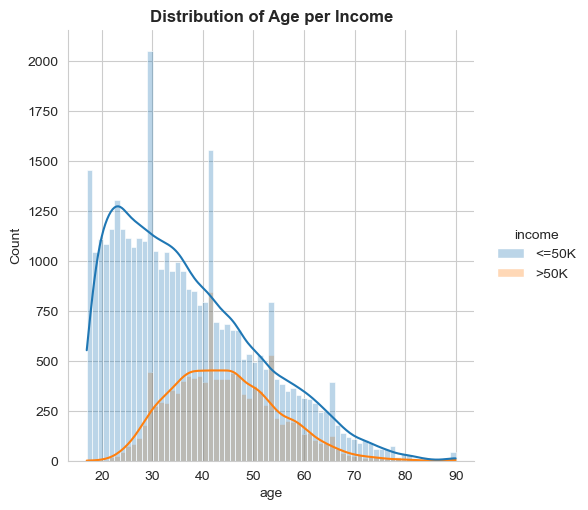

In [12]:
sns.displot(df, x = 'age', hue = 'income',
            kde = True, alpha = 0.3)

plt.title('Distribution of Age per Income',
          fontweight = 'bold')
plt.show()

Those who makes >50K in income are mostly at their 40s. While those who make <=50K are still in their 20s.

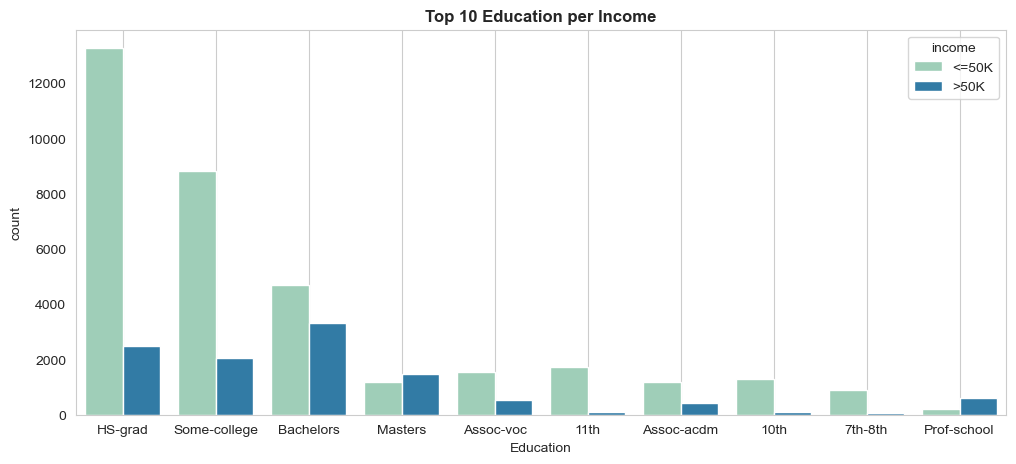

In [13]:
top10_ed = df['education'].value_counts()[:10].index

plt.figure(figsize=(12,5))
sns.countplot(df[df['education'].isin(top10_ed)], x = 'education',
              order = top10_ed, palette='YlGnBu', hue = 'income')
plt.title('Top 10 Education per Income',
          fontweight = 'bold')
plt.xlabel('Education')
plt.grid()


Those who have Masters degree have more people that make >50K, same with Prof-school.

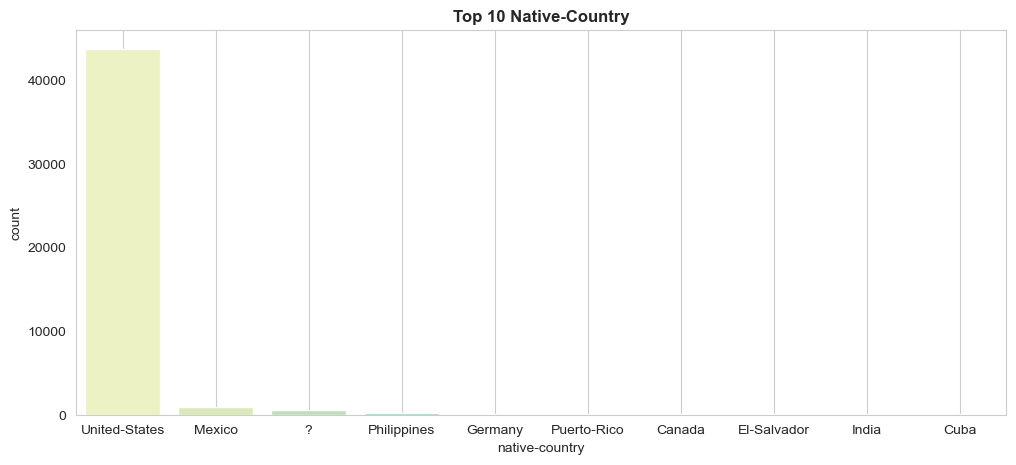

In [14]:
top10_country = df['native-country'].value_counts()[:10].index

plt.figure(figsize=(12,5))

sns.countplot(df[df['native-country'].isin(top10_country)], x = 'native-country',
              order = top10_country, palette = 'YlGnBu')
plt.title('Top 10 Native-Country', fontweight = 'bold')
plt.grid()

Most people comes from the United-States. Since the gap is too big with other countries, moving forward we will categorize those who isn't from United-States to be 'Other'

Male who makes less than 50K : 0.6961093908084741
Female who makes less than 50K : 0.8906472151820486


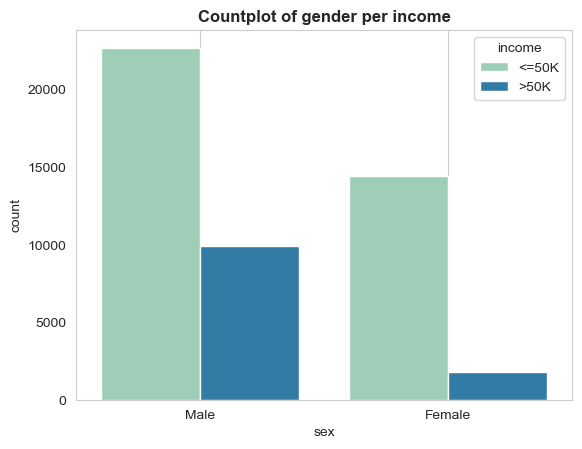

In [15]:
for gender in df['sex'].unique():
    df_gender = df[df['sex'] == gender]
    less_than_50 = df[(df['sex'] == gender) & (df['income'] == '<=50K')]
    print(f"{gender} who makes less than 50K : {less_than_50.shape[0]/df_gender.shape[0]}")

sns.countplot(df, x = 'sex', 
              palette='YlGnBu',
              hue = 'income')
plt.title("Countplot of gender per income", fontweight = 'bold')
plt.grid()

89% of female makes less than 50K in income.

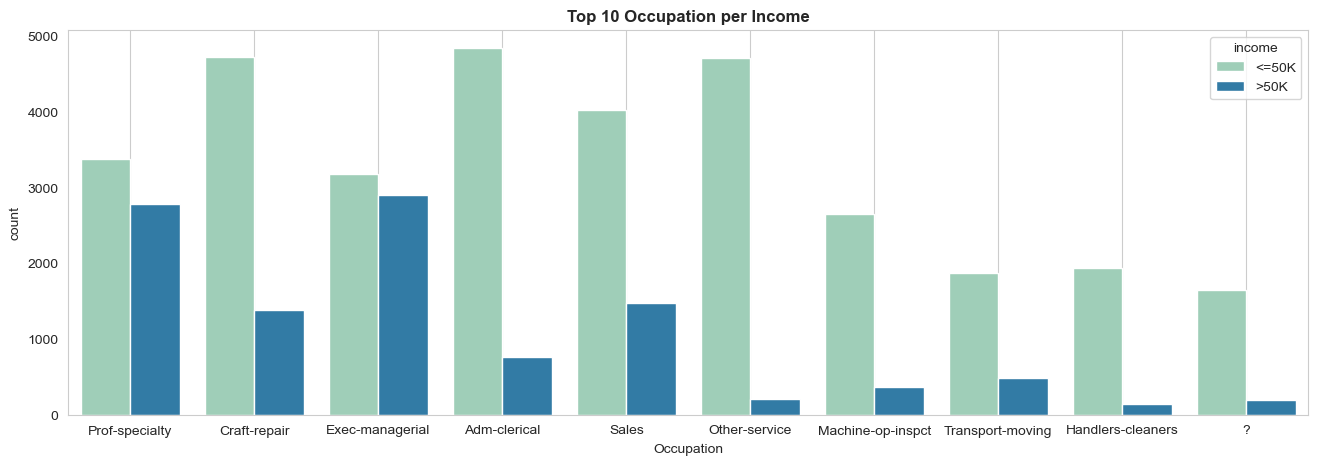

In [16]:
top10_occ = df['occupation'].value_counts()[:10].index

plt.figure(figsize=(16,5))
sns.countplot(df[df['occupation'].isin(top10_occ)], x = 'occupation',
              palette='YlGnBu', order = top10_occ, hue = 'income')
plt.title('Top 10 Occupation per Income',
          fontweight = 'bold')
plt.xlabel('Occupation')
plt.grid()

# Data Cleaning

Based on our initial findings, there are column that have '?' as value. We will change that to be null values.

In [17]:
# changing '?' values to null values

df['workclass'] = df['workclass'].apply(lambda x: np.nan if x == '?' else x)
df['occupation'] = df['occupation'].apply(lambda x: np.nan if x == '?' else x)

In [18]:
# seeing how many null values each col has

for col in df.columns:
    print(f"{col} : {df[col].isnull().sum()/df.shape[0]}%")

age : 0.0%
workclass : 0.05736361027995245%
fnlwgt : 0.0%
education : 0.0%
education-num : 0.0%
marital-status : 0.0%
occupation : 0.05756855351067754%
relationship : 0.0%
race : 0.0%
sex : 0.0%
capital-gain : 0.0%
capital-loss : 0.0%
hours-per-week : 0.0%
native-country : 0.005615444521867442%
income : 0.0%


Since all the column has <0.1% missing values, we will be using Simple Imputer to impute those missing values. For categorical value we will simply use the mode.

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X):
        return self
    
    def transform(self, X):
        column = ['workclass', 'occupation', 'native-country']
        
        for column in X.columns:
            X[column] = X[column].fillna(X[column].mode().values[0])
        
        return X

# Imputing missing values
imputer = FeatureImputer()
df = imputer.fit_transform(df)

# Data Preprocessing

## Feature Creation

Based on the previous analysis and EDA, we know that most people come from the United-States so we will recategorize it and we can also generalize education column e,g, '10th', '11th', and '12th' to be 'HS' (or high school).

In [21]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [22]:
class FeatureCreator(BaseEstimator, TransformerMixin):
    
    def fit(self, X):
        return self
    
    def transform(self, X):
        # Recategorize 'education' column
        
        X['education'] = X['education'].apply(lambda x: 'HS' if x in ["10th", "11th", "12th"] else x)
        X['education'] = X['education'].apply(lambda x: 'JHS' if x in ['7th-8th', '9th'] else x)
        X['education'] = X['education'].apply(lambda x: 'ES' if x in ['1th-4th', '5th-6th'] else x)
        
        
        # Recategorize as 'Other' for county not equal to US
        X['native-country'] = X['native-country'].apply(lambda x: 'Other Country' if x != 'United-States' else x)
        
        # Capital difference
        X['capital-diff'] = X['capital-gain'] - X['capital-loss'] 
        
        return X

# Creating new features
creator = FeatureCreator()
df = creator.fit_transform(df)
        

We will change the target feature to be 1 or 0, where 1 is over 50K and 0 is under 50K

In [34]:
target_map = {'<=50K' : 0,
              '>50K' : 1}

df['income'] = df['income'].map(target_map)

In [23]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

## Encoding Categorical Features

In [24]:
a = pd.get_dummies(df['workclass'], prefix = 'workclass')
pd.concat([df,a], axis = 1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,income,capital-diff,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,<=50K,2174,0,0,0,0,0,0,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,<=50K,0,0,0,0,0,0,1,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,<=50K,0,0,0,0,1,0,0,0,0
3,53,Private,234721,HS,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,<=50K,0,0,0,0,1,0,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,<=50K,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,...,<=50K,0,0,0,0,1,0,0,0,0
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,...,<=50K,0,0,0,0,1,0,0,0,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,<=50K,0,0,0,0,1,0,0,0,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,...,<=50K,5455,0,0,0,1,0,0,0,0


In [25]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X):
        return self
    
    def transform(self, X):
        
        X_encoded = X.copy()
        
        cat_col = X.select_dtypes('object').drop('income', axis = 1).columns 
        
        for col in cat_col:
            # Perform one-hot encoding
            X_encoded = pd.concat([X_encoded, pd.get_dummies(X_encoded[col], prefix = col)], axis = 1)
            
            # Dropping original column
            X_encoded.drop(col, axis = 1, inplace = True)
            
        return X_encoded

# Encoding Categorical Feature    
encoder = FeatureEncoder()
df = encoder.fit_transform(df)

In [26]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,capital-diff,workclass_Federal-gov,workclass_Local-gov,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native-country_Other Country,native-country_United-States
0,39,77516,13,2174,0,40,<=50K,2174,0,0,...,0,0,0,0,0,1,0,1,0,1
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,28,338409,13,0,0,40,<=50K,0,0,0,...,1,0,0,1,0,0,1,0,1,0


## Handle Imbalance Data

In [30]:
# Plot class distribution
def plot_classes(y):
    plt.title("Class distribution")
    plt.pie(x=y.value_counts(), autopct='%.2f', labels=["Under 50K", "Over 50K"])
    
    print(y.value_counts())
    print()

<=50K    37113
>50K     11681
Name: income, dtype: int64



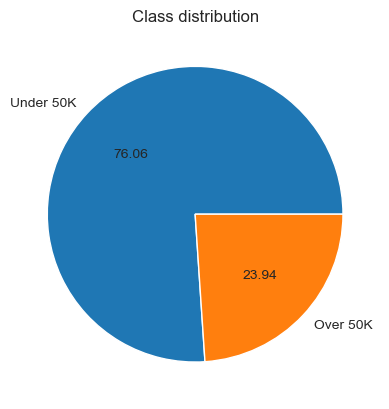

In [31]:
plot_classes(df['income'])

As seen above, the class distribution is slightly imbalanced where Under 50K class dominating the dataset. We will fix this issue using oversampling with SMOTE.

In [32]:
from imblearn.over_sampling import SMOTE

def balance_classes(X_t, y_t):
    sm = SMOTE(random_state=42)
    X_t_res, y_t_res = sm.fit_resample(X_t, y_t)
    return X_t_res, y_t_res

# Modelling

## Applying Resampling

In [37]:
X_train = df.drop('income', axis = 1)
y_train = df['income']

In [38]:
# Perform resampling
X_train, y_train = balance_classes(X_train, y_train)

0    37113
1    37113
Name: income, dtype: int64



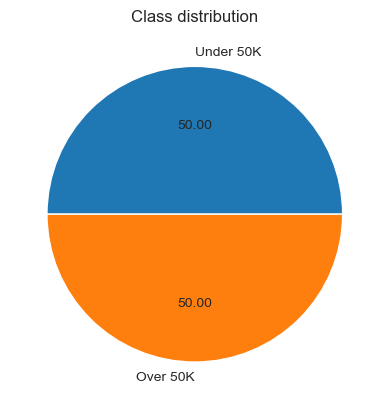

In [39]:
plot_classes(y_train)

## Implementing Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(random_state = 42)
xgb = XGBClassifier(random_state = 42)

score_xgb = cross_val_score(xgb, X_train, y_train, cv = 5)
score_rfc = cross_val_score(rfc, X_train, y_train, cv = 5)

print(f"Cross-val scores: {score_xgb}")

Cross-val scores: [0.7493601  0.86547659 0.95924554 0.95439542 0.95513641]


In [45]:
print(f"Cross-val score using XGB : {score_xgb.mean()} with std : {score_xgb.std()}")
print(f"Cross-val score using RFC : {score_rfc.mean()} with std : {score_rfc.std()}")

Cross-val score using XGB : 0.8967228109114584 with std : 0.08165716779095114
Cross-val score using RFC : 0.8866455606401539 with std : 0.08639645804656267


In [46]:
from sklearn.model_selection import train_test_split

# Splitting data into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

As seen from the Cross-Validation Score, XGBoost have a better score rather than RFC. So we will use XGBoost as our main model for prediction.

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

xgb.fit(X_train, y_train)
pred = xgb.predict(X_val)

print("Classification Report using XGBoost:")
print()
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     11194
           1       0.92      0.90      0.91     11074

    accuracy                           0.91     22268
   macro avg       0.91      0.91      0.91     22268
weighted avg       0.91      0.91      0.91     22268



Based on the classification report above, XGBoost managed to have an accuracy of 91%, which is great!

In [55]:
def plot_feature_importance(importance, names, model_type):
    # Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    # Create a DataFrame using a dictionary
    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)
    
    # Sort the DataFrame in descending order of feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    # Select the top ten most significant features
    fi_df = fi_df.head(10)
    
    # Define plot style
    sns.set(style="whitegrid")

    # Plot feature importance
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=fi_df.feature_importance, y=fi_df.feature_names, palette="rocket")
    plt.title(f"{model_type} Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

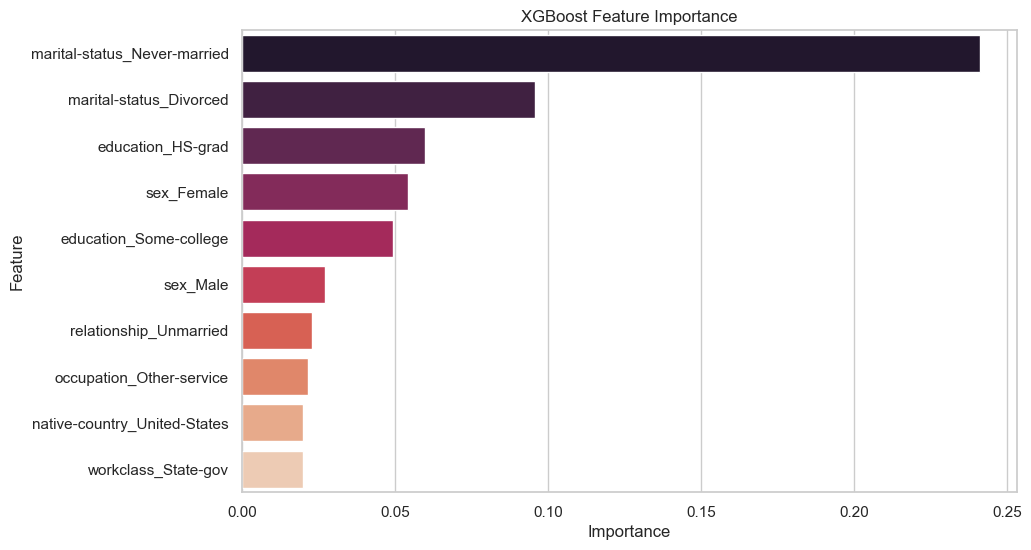

In [56]:
plot_feature_importance(xgb.feature_importances_, X_train.columns, 'XGBoost')

As shown above, XGB Classifier emphasizes a high importance for features such as 'marital-status_Never-married'. This information may be used to implement feature selection to reduce the amount of feature trained on the classifier.